In [26]:
import librosa
import librosa.display as dsp
import soundfile as sf
import numpy as np
import scipy
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from IPython.display import Audio as audioPlayer

In [27]:
#functions for plotting in time and freq domain
def plotFourierMag(song_mag_data):
    xpoints = song_frequency
    ypoints = song_mag_data
    trace0 = go.Scatter(
        x=xpoints, y=ypoints
    )
    data = [trace0]
    plotly.offline.iplot({"data": data, "layout": go.Layout(title="wave")})
def plotInTime():
    time = np.arange(0,len(song))/sr
    fig, ax = plt.subplots()
    ax.plot(time,song)
    ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    plt.show()
def plotWhatever(y):
    x_axis = np.arange(0,y.size)
    fig, ax = plt.subplots()
    ax.plot(x_axis,y)
    ax.set(xlabel='X',ylabel='Y')
    plt.show()

In [28]:
song, sr = librosa.load("data/VocalsMP3.mp3",offset=38, duration=1)
# song, sr = librosa.load("fallout nv_Slow Sax.wav",offset=1.0 ,duration=20.0)
print(song)

[-4.2777850e-05  3.8274206e-04 -1.6530301e-05 ... -9.8394300e-04
 -7.9809478e-04 -1.0643532e-03]


In [29]:
audioPlayer(data=song, rate=sr, autoplay=False)
# audioPlayer("antonio_vivaldi_4seasons_winter.wav", autoplay=True)

In [30]:
# decompose the signal using rfft
def fourier_function(song):
    complex_fft = scipy.fft.rfft(song)
    magnitude = np.abs(complex_fft)
    phase = np.angle(complex_fft)
    frequency = scipy.fft.rfftfreq(len(song), 1 / sr)
    return magnitude, phase, frequency

song_magnitude, song_phase, song_frequency=fourier_function(song)
print(song_frequency.shape)

(11026,)


In [31]:
plotFourierMag(song_magnitude)
print(len(song))
print(len(song_magnitude))

22050
11026


In [32]:
i = [[175,550],[2650, 4400]] #pick hit miss
o = [[165,260],[600,750],[820,1000]] # hooooooooot
ae = [[170,265],[670,775],[975,1270],[470,510]]

#Take a copy of the magnitude list, then do operations
new_mag = song_magnitude.copy()
def equalizerRange_Window(magnitude,frequency,slider_ranges,slider_dB):
    #manipulate mag over a specific range
    for rng in slider_ranges:
        # adjust magnitude of range in list      
        target_freq= list(np.where((frequency>rng[0])&(frequency<rng[1]))[0])
        for i in target_freq:
            new_mag[i]=song_magnitude[i]*10**(slider_dB)
        print(rng[0])

In [33]:
#Take a copy of the magnitude list, then do operations
new_mag = song_magnitude.copy()
# function that uses triangle window to manipulate data, still not done
def equalizerRange_Triangle(magnitude,frequency,slider_ranges,slider_dB):
    #manipulate mag over a specific range
    for rng in slider_ranges:
        # adjust magnitude of range in list      
        target_freq= list(np.where((frequency>rng[0])&(frequency<rng[1]))[0])
        #generate a triangular window
        triangle_window = 10**((slider_dB)*scipy.signal.windows.triang(len(target_freq)))

        for i,window in zip(target_freq,triangle_window):
            new_mag[i]=song_magnitude[i]*window
        print(rng[0])

In [34]:
# inverse reconstruction of signal ==> y[frequency]= (magnitude*(e^(phase)))
def calc_inv_fourier(mag, phase):
    New_signal = np.multiply(mag, np.exp(1j * phase))
    inv_fourier_signal = np.real(scipy.fft.irfft(New_signal))
    #inv_fourier_signal = inv_fourier_signal.astype(np.int16) #commented cuz it breaks the function, dunno why
    return inv_fourier_signal


In [35]:
# function calls for adjusting the curve according to the value and range list of each slider
equalizerRange_Window(song_magnitude,song_frequency,ae,-5)
# equalizerRange_Window(song_magnitude,song_frequency,bass,1.5)

plotFourierMag(new_mag)
song_edited = calc_inv_fourier(new_mag, song_phase)


170
670
975
470


In [36]:
# audioPlayer(data=y_harmonic, rate=sr, autoplay=True)
# play the edited data
audioPlayer(data=song_edited, rate=sr, autoplay=False)

In [37]:
# for writing the song 
sf.write('after.wav', song_edited, sr)

In [38]:
# extract the percussive component
y_percussive = librosa.effects.percussive(song, margin=5)
y_harmonic = librosa.effects.harmonic(song, margin=5)

In [39]:
# drawing a spectrogram
# d = librosa.stft(y_percussive)
# D = librosa.amplitude_to_db(np.abs(d),ref=np.max)
# fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
# img = dsp.specshow(D, y_axis='linear', x_axis='s',sr=sr,ax=ax[0])
# ax[0].set(title='Linear frequency power spectrogram')
# ax[0].label_outer()
# dsp.specshow(D,y_axis='log',x_axis='s',sr=sr,ax=ax[1])
# ax[1].set(title='Log frequency power spectrogram')
# ax[1].label_outer()
# fig.colorbar(img, ax=ax, format='%+2.f dB')

In [40]:
# Bin separation and operations
# 125 Hz–1KHz freq range for violins
# 260 Hz–3.5KHz for celeste
# slider_ranges= [[[200,1500],[1500,3500]]]

# def equalizer(magnitude,frequency,sliders_value): 
# # iterate on slider values 
#     for itr in sliders_value:
#         #for each slider, iterate on the ranges
#         for comp in slider_ranges:
#             #for each range (which is a list)
#             for rng in comp:
#                 # adjust magnitude of range in list      
#                 target_freq= list(np.where((frequency>rng[0])&(frequency<rng[1]))[0])
#                 for i in target_freq:
#                     song_magnitude[i]=song_magnitude[i]*10**(itr)                
# equalizer(song_magnitude,song_frequency,[0,0,0])

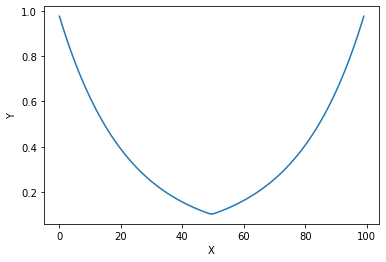

[0.97723722 0.9332543  0.89125094 0.85113804 0.81283052 0.77624712
 0.74131024 0.70794578 0.67608298 0.64565423 0.616595   0.58884366
 0.56234133 0.5370318  0.51286138 0.48977882 0.46773514 0.44668359
 0.42657952 0.40738028 0.38904514 0.37153523 0.35481339 0.33884416
 0.32359366 0.30902954 0.29512092 0.28183829 0.26915348 0.25703958
 0.24547089 0.23442288 0.22387211 0.21379621 0.20417379 0.19498446
 0.18620871 0.17782794 0.16982437 0.16218101 0.15488166 0.14791084
 0.14125375 0.13489629 0.12882496 0.12302688 0.11748976 0.11220185
 0.10715193 0.1023293  0.1023293  0.10715193 0.11220185 0.11748976
 0.12302688 0.12882496 0.13489629 0.14125375 0.14791084 0.15488166
 0.16218101 0.16982437 0.17782794 0.18620871 0.19498446 0.20417379
 0.21379621 0.22387211 0.23442288 0.24547089 0.25703958 0.26915348
 0.28183829 0.29512092 0.30902954 0.32359366 0.33884416 0.35481339
 0.37153523 0.38904514 0.40738028 0.42657952 0.44668359 0.46773514
 0.48977882 0.51286138 0.5370318  0.56234133 0.58884366 0.6165

In [41]:
# generating a trianglular window
# triangle_window=(10**(slider_dB))*scipy.signal.windows.triang(len(target_freq))
slider=-1
# triangle_window=10**(slider*scipy.signal.windows.triang(100))
triangle_window=10**(slider*scipy.signal.windows.triang(100))

plotWhatever(triangle_window)
print(triangle_window)
# for i in triangle_window:
#     print(i)

In [42]:
print("you got this")

you got this


In [43]:
# plotting part with plotly, abit slow
# xpoints = np.arange(0, song.size, 1)
# ypoints = song
# trace0 = go.Scatter(
#    x = xpoints, y = ypoints
# )
# data = [trace0]
# plotly.offline.iplot({ "data": data,"layout": go.Layout(title="Sine wave")})